In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib
import sys
from datetime import datetime, timedelta
from time import sleep, time
import numpy as np
import pandas.plotting._converter as pandacnv
from ROOT import TH1D, TCanvas, TNtuple, kBlue, kRed, kBlack
pandacnv.register()


Welcome to JupyROOT 6.18/02


In [7]:
names = ['time','IDC','IAC']
#df = pd.read_csv("TCMS_RadTest/data_run/DMM_data/dmm_data6894024_2022_05_25_114444_00000.dat",delimiter=' ',header=None, names=names, error_bad_lines=False,parse_dates=['time'])
#df = pd.read_csv("dmm_data_2022_05_25-29.dat",delimiter=' ',header=None, names=names, error_bad_lines=False,parse_dates=['time'])
#df = pd.read_csv("dmm_data_2022_06_02-14_all.dat",delimiter=' ',header=None, names=names, error_bad_lines=False,parse_dates=['time'])
#df = pd.read_csv("dmm_data_2022_09_14-20_all_cpld.dat",delimiter=' ',header=None, names=names, error_bad_lines=False,parse_dates=['time'])
df = pd.read_csv("dmm_data_2022_09_14-20_all_trenz.dat",delimiter=' ',header=None, names=names, error_bad_lines=False,parse_dates=['time'])
df['time'] = df['time'].astype('float64').astype('datetime64[s]') + timedelta(hours=2)
#df.index=df['time']

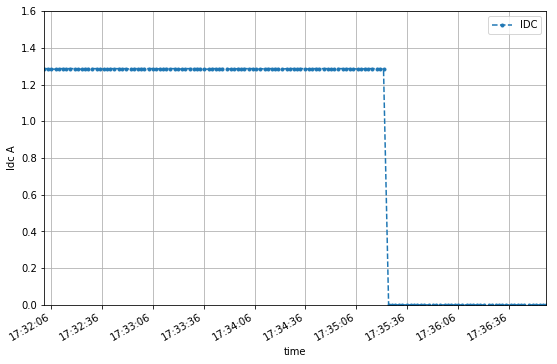

In [14]:
#df[(df['time']<'2022-06-12 00:30:00')&(df['time']>'2022-06-12 00:00:00')].plot(x='time',y='IDC',grid=True, figsize=(9,6), ylim=(0,0.9),marker='.',linestyle='--')
#df.plot(x='time',y='IDC',grid=True, figsize=(9,6), ylim=(0,1.6),marker='.',linestyle='--')
#df[(df['time']<'2022-05-29 13:45:00')&(df['time']>'2022-05-29 13:40:00')].plot(x='time',y='IDC',grid=True, figsize=(9,6), ylim=(0,1.6),marker='.',linestyle='--')
df[(df['time']>'2022-09-17 17:32:00')&(df['time']<'2022-09-17 17:37:00')].plot(x='time',y='IDC',grid=True, figsize=(9,6), ylim=(0,1.6),marker='.',linestyle='--')
plt.ylabel('Idc A')
#plt.savefig('FirstRunAna/current_fail_202206_12_all.svg', bbox_inches='tight')
#plt.savefig('SecondRunAna/current_202209_14-20_all_cpld.png', bbox_inches='tight')
#plt.savefig('SecondRunAna/current_202209_14-20_all_trenz.png', bbox_inches='tight')
plt.show()

In [ ]:
    xmin=0.0
    xmax=1.6
    nbins=50
    dt=(xmax-xmin)/nbins
    bins = [xmin + dt*k for k in range(nbins+1)]
    df['IDC'].hist(bins=bins)
    plt.savefig('FirstRunAna/current_hist_all.svg', bbox_inches='tight')

In [18]:
%jsroot on
#tdata = TNtuple('data',"current data","Time:IDC:IAC")
tdata = TNtuple('data',"current data","Time:IDC")
#tdata.ReadFile('dmm_data_2022_05_25-29.dat')
#tdata.ReadFile('dmm_data_2022_06_02-14_all.dat')
#tdata.ReadFile('dmm_data_2022_09_14-20_all_trenz.dat')
tdata.ReadFile('dmm_data_2022_09_14-20_all_cpld.dat')
c = TCanvas('c','canvas',800,600)
c.SetGrid()
c.SetLeftMargin(0.15)
hist = TH1D('hIDC','I DC',75,0,0.12)
hist.SetLineWidth(2)
hist.SetFillColor(kBlue+2)
hist.GetXaxis().SetTitle('I_{DC} A')
hist.GetYaxis().SetTitle('dN/dI_{DC}')
tdata.Draw('IDC>>hIDC')
c.Draw()
#c.SaveAs('SecondRunAna/current_hist_09_14-20_all_trenz.gif')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hIDC (Potential memory leak).


0.6869918699186992